# **Project on "Prediction Flight Delay"**

This project aims to develop a machine learning model to predict the probability of a flight being
delayed/cancelled based on historical data. By analysing features such as airline, flight schedules, airport congestion,
and seasonal trends, the project seeks to identify key factors contributing to delays and provide customers to have insight
on their flight carrier and their journey delay status. The outcome will include a predictive model and UI to get
information about the delays and Dashboard for Historical data visualization

## **Analysis on Flight Data**

In [123]:
import pandas as pd

# Read the parquet file
df = pd.read_parquet("/content/final_sampled_flight_data_all_years.parquet")

# Display the first few rows
print(df.head())


  FlightDate                 Airline Origin Dest  Cancelled  Diverted  \
0 2018-01-01    Alaska Airlines Inc.    LAX  SEA      False     False   
1 2018-01-01  Southwest Airlines Co.    DEN  SFO      False     False   
2 2018-01-01   United Air Lines Inc.    DEN  SFO      False     False   
3 2018-01-01    Delta Air Lines Inc.    OAK  SLC      False     False   
4 2018-01-01   United Air Lines Inc.    DFW  LAX      False     False   

   CRSDepTime DepTime  DepDelayMinutes  DepDelay  ...  CRSArrTime  ArrDelay  \
0        2335   00:57             82.0      82.0  ...         233      50.0   
1        2225   01:18            173.0     173.0  ...          15     154.0   
2         537   05:33              0.0      -4.0  ...         722      -8.0   
3         600   05:59              0.0      -1.0  ...         850     -12.0   
4         545   05:39              0.0      -6.0  ...         734     -14.0   

   ArrDel15  ArrivalDelayGroups  ArrTimeBlk  DistanceGroup  \
0       1.0             

### **Checking Null Values in Dataset**

In [124]:
# Check for null values in each column
null_values = df.isnull().sum()

# Display null values
print(null_values)

FlightDate                                 0
Airline                                    0
Origin                                     0
Dest                                       0
Cancelled                                  0
Diverted                                   0
CRSDepTime                                 0
DepTime                                    0
DepDelayMinutes                            0
DepDelay                                   0
ArrTime                                    0
ArrDelayMinutes                            0
AirTime                                    0
CRSElapsedTime                             0
ActualElapsedTime                          0
Distance                                   0
Year                                       0
Quarter                                    0
Month                                      0
DayofMonth                                 0
DayOfWeek                                  0
Marketing_Airline_Network                  0
Operated_o

In [125]:
df  = df.iloc[:]

display(df)


KeyboardInterrupt: 

### **Total Rows and Columns in DataSet**

In [126]:
# Get the number of rows and columns
rows, columns = df.shape

# Display the result
print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")

Total Rows: 740204
Total Columns: 64


In [129]:
# Get all column names
columns = df.columns

# Count total number of columns
column_count = len(columns)

# Display column names and count
print(f"Total Columns: {column_count}")
print("Column Names:")
print(columns.tolist())

Total Columns: 64
Column Names:
['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 

# **Define the required columns (replace "Delayed" with "ArrDel15")**

Columns Removed from the Original Dataset
The following columns were removed because they are not in the required list:

Marketing_Airline_Network
Operated_or_Branded_Code_Share_Partners
DOT_ID_Marketing_Airline
IATA_Code_Marketing_Airline
Flight_Number_Marketing_Airline
DOT_ID_Operating_Airline
IATA_Code_Operating_Airline
Tail_Number
Flight_Number_Operating_Airline
OriginAirportSeqID
OriginCityMarketID
OriginState
OriginStateFips
OriginWac
DestAirportSeqID
DestCityMarketID
DestStateFips
DestWac
DepTimeBlk
WheelsOn
ArrTimeBlk
DivAirportLandings
Day
Hour
Date



We removed these columns because they mostly contain IDs, codes, or other irrelevant information that do not contribute to your analysis.

In [130]:
# Define the required columns (replace "Delayed" with "ArrDel15")
required_columns = [
    'FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime',
    'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime',
    'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
    'Operating_Airline', 'OriginAirportID', 'OriginCityName', 'OriginStateName', 'DestAirportID',
    'DestCityName', 'DestState', 'DestStateName', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut',
    'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups',
    'DistanceGroup'
]

# Filter the DataFrame with required columns
df_filtered = df[required_columns].copy()

# Create a new "Delayed" column based on "ArrDel15"
df_filtered['Delayed'] = df_filtered['ArrDel15'].fillna(0).astype(int)

# Save the updated DataFrame to a new CSV file
df_filtered.to_csv("filtered_output.csv", index=False)

print("Filtered CSV file saved successfully.")
print("Remaining Columns:", df_filtered.columns.tolist())


Filtered CSV file saved successfully.
Remaining Columns: ['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Operating_Airline', 'OriginAirportID', 'OriginCityName', 'OriginStateName', 'DestAirportID', 'DestCityName', 'DestState', 'DestStateName', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'Delayed']


### **Newly Filtered Dataframe**

In [131]:
df_new = pd.read_csv("//content//filtered_output.csv")

# Display the first few rows
print(df_new.head())

# Check the shape (rows, columns)
print(f"Dataset contains {df_new.shape[0]} rows and {df_new.shape[1]} columns.")

   FlightDate                 Airline Origin Dest  Cancelled  Diverted  \
0  2018-01-01    Alaska Airlines Inc.    LAX  SEA      False     False   
1  2018-01-01  Southwest Airlines Co.    DEN  SFO      False     False   
2  2018-01-01   United Air Lines Inc.    DEN  SFO      False     False   
3  2018-01-01    Delta Air Lines Inc.    OAK  SLC      False     False   
4  2018-01-01   United Air Lines Inc.    DFW  LAX      False     False   

   CRSDepTime DepTime  DepDelayMinutes  DepDelay  ...  TaxiOut  WheelsOff  \
0        2335   00:57             82.0      82.0  ...     13.0      110.0   
1        2225   01:18            173.0     173.0  ...     14.0      132.0   
2         537   05:33              0.0      -4.0  ...     13.0      546.0   
3         600   05:59              0.0      -1.0  ...     18.0      617.0   
4         545   05:39              0.0      -6.0  ...     17.0      556.0   

   WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups  \
0     317.0     6

### **Total Rows and Columns From Newly Dataframe**

In [132]:
# Get the number of rows and columns
rows, columns = df_new.shape

# Display the result
print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")


Total Rows: 740204
Total Columns: 41


### **Number of Rows Per Year and Month**

In [133]:
# Count the number of rows per year and month
rows_per_month = df_new.groupby(['Year', 'Month']).size()

# Display the result
print("Rows per Month:\n", rows_per_month)


Rows per Month:
 Year  Month
2018  1        12469
      2        12349
      3        12631
      4        12564
      5        12783
      6        12694
      7        12638
      8        16273
      9        15457
      10       15920
      11       15428
      12       15969
2019  1        12385
      2        12231
      3        12477
      4        12448
      5        12552
      6        12528
      7        12500
      8        16144
      9        15454
      10       16059
      11       15512
      12       16131
2020  1        12603
      2        12884
      3        12002
      4        12011
      5        11240
      6        11010
      7        11211
      8        14745
      9        14073
      10       14498
      11       14238
      12       14637
2021  1        11644
      2        11547
      3        11944
      4        12115
      5        12289
      6        12396
      7        12393
      8        16019
      9        15174
      10       15750
     

## **Finding and Handling Outlier's**

Handling Outliers Using the Capping (Winsorization) Method
Instead of removing outliers (which could lead to data loss), they are capped (Winsorized).

If a value is above the upper bound, it is replaced with the upper bound.
If a value is below the lower bound, it is replaced with the lower bound.
 Why Capping Instead of Removing?

Flight delays often have extreme values, but removing them could eliminate real operational delays.
Capping preserves data integrity while preventing extreme values from distorting machine learning models.

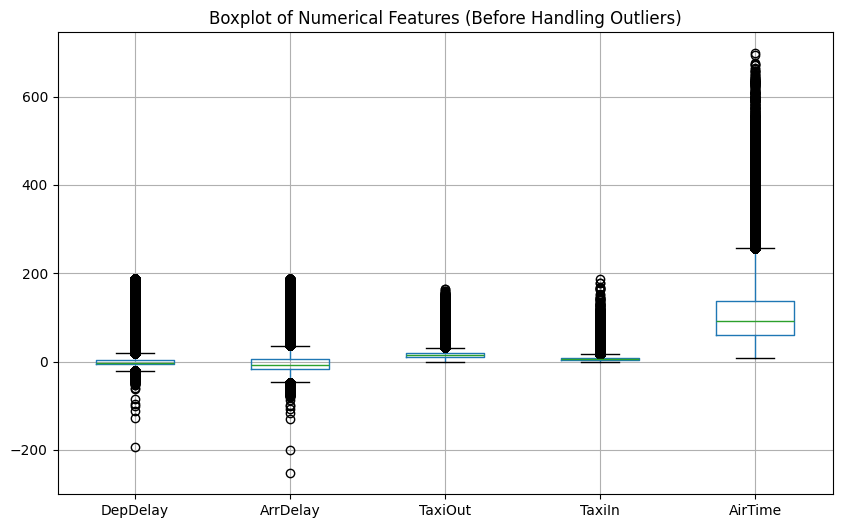

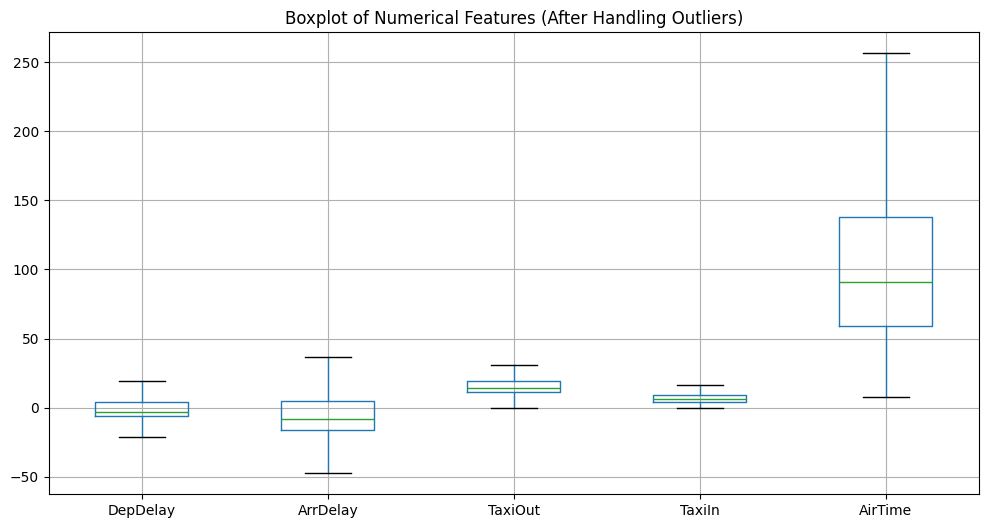

Number of outliers removed per column: {'DepDelay': 101512, 'ArrDelay': 63240, 'TaxiOut': 41916, 'TaxiIn': 40560, 'AirTime': 38025}


In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df_new is a DataFrame
if not isinstance(df_new, pd.DataFrame):
    raise ValueError("df_new is not a DataFrame. Check your dataset loading step.")

# Select numerical columns for outlier detection
numerical_cols = ['DepDelay', 'ArrDelay', 'TaxiOut', 'TaxiIn', 'AirTime']

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, col):
    if col not in data.columns:
        raise KeyError(f"Column '{col}' not found in the DataFrame.")

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

# Detect outliers for each numerical column
outliers_dict = {col: detect_outliers_iqr(df_new, col) for col in numerical_cols}

# Visualizing outliers using boxplots (Before Handling)
plt.figure(figsize=(10, 6))
df_new[numerical_cols].boxplot()
plt.title("Boxplot of Numerical Features (Before Handling Outliers)")
plt.show()

# Handling Outliers: Capping method using .clip()
df_cleaned = df_new.copy()
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[col] = df_cleaned[col].clip(lower_bound, upper_bound)  # Capping values

# Replace only the modified columns in df_new
df_new.update(df_cleaned[numerical_cols])  # Updates only the outlier-handled columns

# Visualizing after handling outliers
plt.figure(figsize=(12, 6))
df_new[numerical_cols].boxplot()
plt.title("Boxplot of Numerical Features (After Handling Outliers)")
plt.show()

# Compare number of outliers removed
outliers_removed = {col: len(outliers_dict[col]) for col in numerical_cols}
print("Number of outliers removed per column:", outliers_removed)


### **Unique Values from Categorical Columns**

In [91]:
# Step 3: Categorical Columns Analysis
print("\nCategorical columns analysis:")
print(df_new.select_dtypes(include=['object']).nunique())

## It is good to do One_hot_encoding  with this catagorical columns


Categorical columns analysis:
FlightDate           1673
Airline                28
Origin                387
Dest                  387
DepTime              1435
Operating_Airline      28
OriginCityName        380
OriginStateName        53
DestCityName          380
DestState              53
DestStateName          53
dtype: int64


## **Delayed vs non-delayed flights**


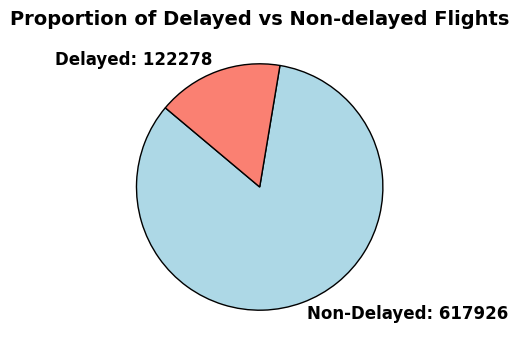

In [92]:
import matplotlib.pyplot as plt

# Count occurrences of each category in 'Delayed' column
delayed_counts = df_new['Delayed'].value_counts()

# Define labels with actual counts
labels = [f'Non-Delayed: {delayed_counts[0]}' if val == 0 else f'Delayed: {delayed_counts[1]}' for val in delayed_counts.index]

# Define colors
colors = ['lightblue', 'salmon']

# Create pie chart
plt.figure(figsize=(8, 4))
plt.pie(delayed_counts, labels=labels, colors=colors, startangle=140,
        textprops={'fontsize': 12, 'fontweight': 'bold'}, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Proportion of Delayed vs Non-delayed Flights', fontsize=14, fontweight='bold')

# Show the plot
plt.show()


## **Delayed Percentage per Year**

<Figure size 800x400 with 0 Axes>

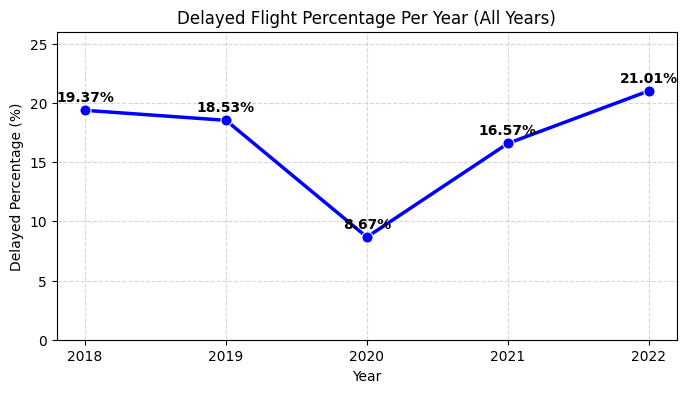

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
# Step 1: Calculate Total Flights and Delayed Flights Per Year
df_yearly = df.groupby('Year').agg(
    total_flights=('ArrDel15', 'size'),  # Total flights per year
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count of delayed flights per year
).reset_index()

# Step 2: Calculate Delayed Percentage per Year
df_yearly['delayed_percentage'] = (df_yearly['delayed_flights'] / df_yearly['total_flights']) * 100

# Step 3: Sort Data by Year
df_yearly = df_yearly.sort_values(by='Year')

# Step 4: Create Line Plot with Data Labels
plt.figure(figsize=(8, 4))
ax = sns.lineplot(x='Year', y='delayed_percentage', data=df_yearly, marker='o', color='b', linewidth=2.5, markersize=8)

# Add data labels on points
for index, row in df_yearly.iterrows():
    ax.text(row['Year'], row['delayed_percentage'] + 0.5,  # Position of the label
            f'{row["delayed_percentage"]:.2f}%',  # Format as 2 decimal places
            ha='center', va='bottom', fontsize=10, fontweight='bold')  # Styling

# Customize plot labels
plt.xlabel("Year")
plt.ylabel("Delayed Percentage (%)")
plt.title("Delayed Flight Percentage Per Year (All Years)")
plt.ylim(0, df_yearly['delayed_percentage'].max() + 5)  # Adjust y-axis for better visibility
plt.xticks(df_yearly['Year'])  # Show all years on the x-axis
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid for better readability

# Show the plot
plt.show()


In 2020, flight delays decreased primarily due to the impact of the COVID-19 pandemic, which significantly reduced air travel. Key reasons include:

Reduced Air Traffic – Global travel restrictions led to fewer flights, reducing congestion.
Flight Cancellations – Airlines canceled many flights, improving schedule efficiency.
Fewer Weather-Related Delays – Reduced traffic allowed easier rerouting around bad weather.
Less Air Traffic Control (ATC) Congestion – Fewer planes resulted in smoother operations.
Shorter Ground Delays – Faster boarding, baggage handling, and taxiing due to lower airport activity.

## **Monthly Average Delay Minutes: Insights from Flight Data Analysis**

In [134]:
import pandas as pd
monthly_delay = df.groupby('Month')['ArrDelayMinutes'].mean()
print(monthly_delay)

Month
1      8.650546
2     10.167281
3      8.389676
4      8.147466
5      9.160189
6     11.925879
7     11.765353
8     11.284690
9      7.248196
10     8.217639
11     7.551310
12     9.874270
Name: ArrDelayMinutes, dtype: float64


(Feb, Jun, July, Aug) thses months has more Delay minutes During Arrival
so, these months having more probabilty that Flight is having Arrival Delay

## **Average of Departure Delay By months**

In [135]:
monthlyDep_delay = df.groupby('Month')['DepDelayMinutes'].mean()
print(monthlyDep_delay)

Month
1      8.593038
2      9.849826
3      8.495508
4      8.199294
5      9.218385
6     11.930016
7     11.714760
8     11.024454
9      7.135111
10     8.047745
11     7.494030
12     9.875004
Name: DepDelayMinutes, dtype: float64


(Feb, Jun, July) thses months has more Delay minutes During Arrival
so, these months having more probabilty that Flight is having Arrival Delay

## **Average Delay by Month**

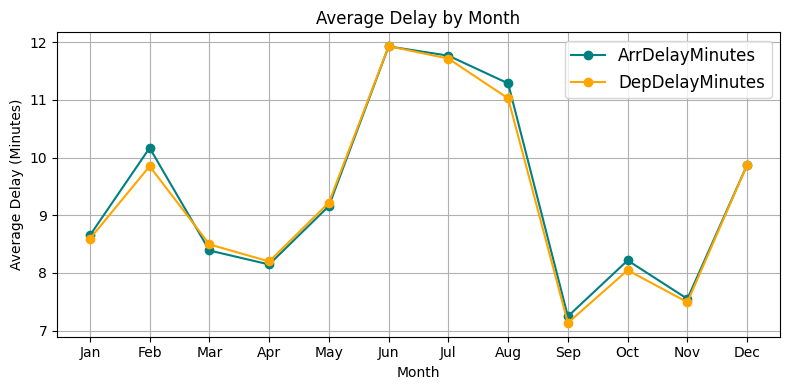

In [96]:
#  Average of DepartureDelay By months
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
monthly_delay.plot(kind='line', marker='o', color='teal', title='Average Delay by Month')
monthlyDep_delay.plot(kind='line', marker='o', color='Orange', title='Average Delay by Month')

plt.xlabel('Month')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

Top Reasons for Flight Delays in June, July, and August (U.S. Summer Months)
1️⃣ Peak Summer Travel Season – High passenger demand leads to congestion at airports.
2️⃣ Air Traffic Congestion – Increased flights cause bottlenecks in the air and on runways.
3️⃣ Frequent Thunderstorms – Common in the Midwest and Southeast, causing weather-related delays.
4️⃣ Hurricane Season (June–November) – Affects flights, especially in coastal states.
5️⃣ Extreme Heat – High temperatures in states like Arizona and Texas impact aircraft performance.
6️⃣ Pilot & Crew Shortages – Airlines struggle with staffing, leading to cancellations or delays.
7️⃣ Ground Operations Delays – Baggage handling, fueling, and boarding take longer.
8️⃣ Knock-On Effect of Delays – Delays at one airport affect schedules at others.

Would you like to analyze delays for specific airlines or routes? 🚀✈️

## **Delayed Percentage per Month**

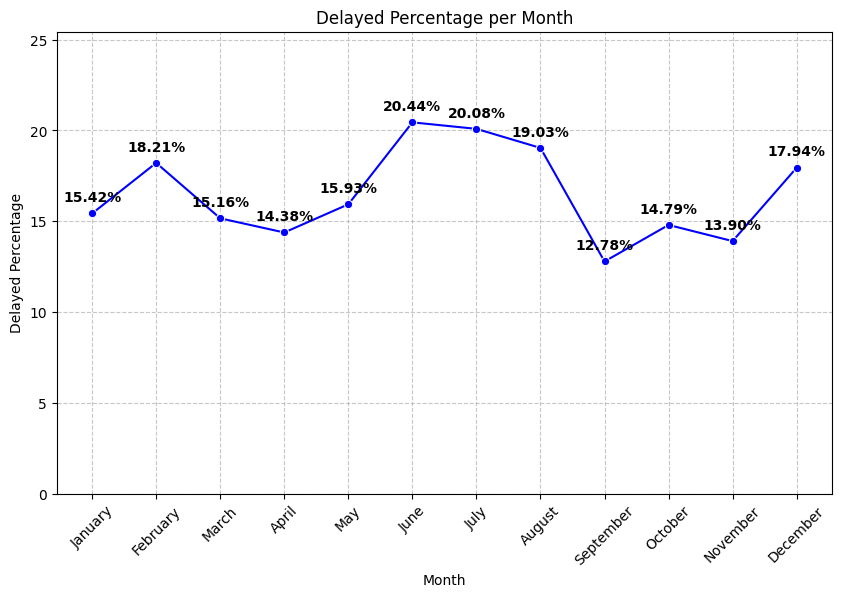

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Step 1: Calculate Total Flights and Delayed Flights Per Month
df_monthly = df_new.groupby('Month').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per month
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per month
).reset_index()

# Step 2: Replace month numbers with month names
df_monthly['Month'] = df_monthly['Month'].apply(lambda x: calendar.month_name[x])

# Step 3: Calculate Delayed Percentage per Month
df_monthly['delayed_percentage'] = (df_monthly['delayed_flights'] / df_monthly['total_flights']) * 100

# Step 4: Create Line Plot with Data Labels
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Month', y='delayed_percentage', data=df_monthly, marker='o', linestyle='-', color='b')

# Add data labels
for index, row in df_monthly.iterrows():
    ax.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
            f'{row["delayed_percentage"]:.2f}%',  # Format the percentage with 2 decimal places
            ha='center', va='bottom', fontsize=10, fontweight='bold')  # Styling

# Customize plot labels
plt.xlabel("Month")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Month")
plt.xticks(rotation=45)  # Rotate month names for better visibility
plt.ylim(0, df_monthly['delayed_percentage'].max() + 5)  # Adjust y-axis for visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The higher delays in February, June, July, August, and December can be attributed to the following reasons:

February – Winter weather disruptions (snowstorms, fog, and icy conditions), especially in North America and Europe, lead to frequent delays.
June & July – Start of summer vacation season, leading to higher passenger traffic and congestion at airports. Thunderstorms and hurricanes also cause disruptions.
August – Peak summer travel continues, with overcrowding and weather-related delays like hurricanes in some regions.
December – Holiday travel surge (Christmas & New Year), coupled with harsh winter conditions, leads to significant delays.

## **Delayed Percentage per Day of the Week**

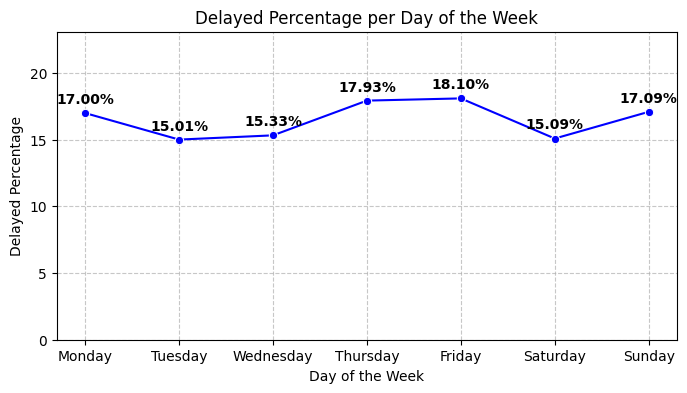

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Day of the Week
df_weekday = df_new.groupby('DayOfWeek').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per day of the week
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per day of the week
).reset_index()

# Step 2: Calculate Delayed Percentage per Day of the Week
df_weekday['delayed_percentage'] = (df_weekday['delayed_flights'] / df_weekday['total_flights']) * 100

# Step 3: Create Line Plot with Data Labels
plt.figure(figsize=(8, 4))
ax = sns.lineplot(x='DayOfWeek', y='delayed_percentage', data=df_weekday, marker='o', linestyle='-', color='b')

# Add data labels
for index, row in df_weekday.iterrows():
    ax.text(row['DayOfWeek'], row['delayed_percentage'] + 0.5,  # Position of the label
            f'{row["delayed_percentage"]:.2f}%',  # Format with 2 decimal places
            ha='center', va='bottom', fontsize=10, fontweight='bold')  # Styling

# Customize plot labels
plt.xlabel("Day of the Week")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Day of the Week")
plt.xticks(df_weekday['DayOfWeek'], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(0, df_weekday['delayed_percentage'].max() + 5)  # Adjust y-axis for visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The higher delays on Monday, Thursday, Friday, and Sunday can be explained by these factors:

Monday – Start of the business week; heavy corporate travel and airport congestion lead to delays.
Thursday – Increased mid-week business and leisure travel, causing air traffic congestion.
Friday – Peak travel day for weekend trips; high passenger volume leads to airport and runway congestion.
Sunday – End of the weekend; travelers returning home cause a surge in flights, increasing the likelihood of delays.

## **Delayed Percentage per Airline**

<ipython-input-99-49da8c4e8779>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Airline', y='delayed_percentage', data=df_airline, palette='Blues')


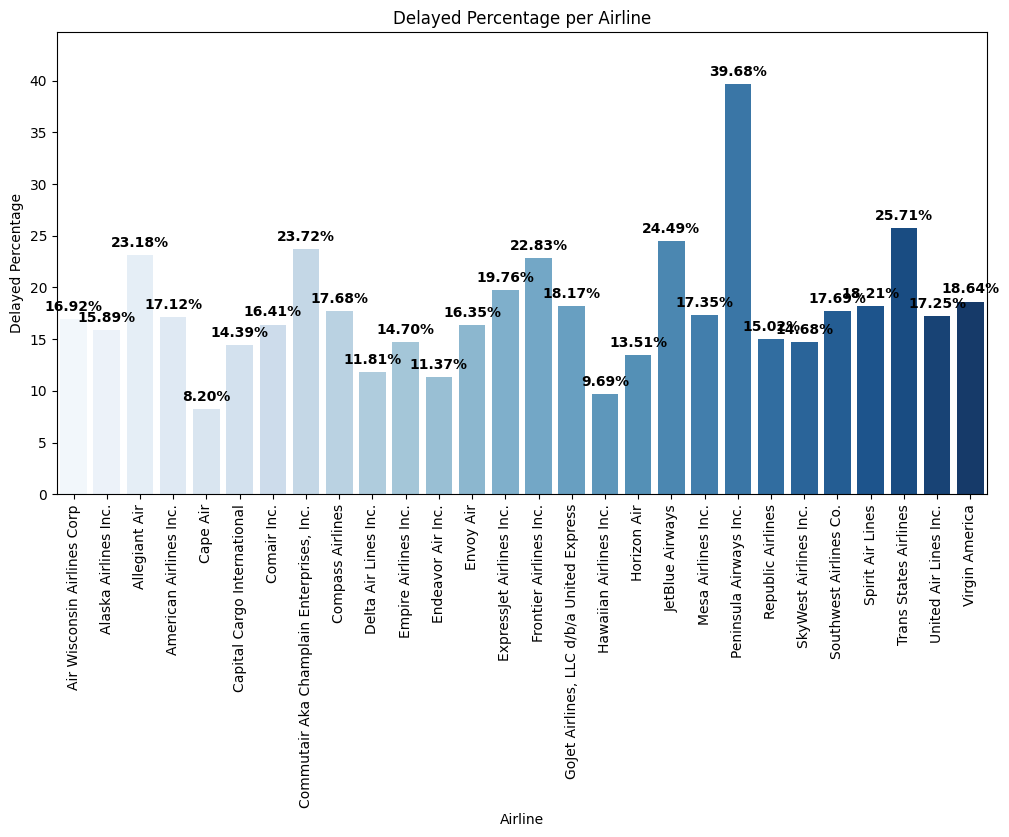

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Airline
df_airline = df_new.groupby('Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Airline
df_airline['delayed_percentage'] = (df_airline['delayed_flights'] / df_airline['total_flights']) * 100

# Step 3: Create Bar Plot with Data Labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Airline', y='delayed_percentage', data=df_airline, palette='Blues')

# Add data labels
for index, row in df_airline.iterrows():
    ax.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
            f'{row["delayed_percentage"]:.2f}%',  # Format with 2 decimal places
            ha='center', va='bottom', fontsize=10, fontweight='bold')  # Styling

# Customize plot labels
plt.xlabel("Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Airline")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.ylim(0, df_airline['delayed_percentage'].max() + 5)  # Adjust y-axis for visibility

# Show the plot
plt.show()


 ## **Delayed Percentage per Airline**

In [100]:
import pandas as pd
from tabulate import tabulate

# Step 1: Calculate Total Flights and Delayed Flights Per Airline
df_airline = df_new.groupby('Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Airline
df_airline['delayed_percentage'] = (df_airline['delayed_flights'] / df_airline['total_flights']) * 100

# Step 3: Display as a table
df_airline = df_airline.sort_values(by='delayed_percentage', ascending=False)  # Sort by delayed percentage
df_airline.rename(columns={
    'Airline': 'Airline Name',
    'total_flights': 'Total Flights',
    'delayed_flights': 'Delayed Flights',
    'delayed_percentage': 'Delayed Percentage (%)'
}, inplace=True)

# Print table format using tabulate for better readability
print(tabulate(df_airline, headers='keys', tablefmt='pretty', showindex=False))


+-------------------------------------------+---------------+-----------------+------------------------+
|               Airline Name                | Total Flights | Delayed Flights | Delayed Percentage (%) |
+-------------------------------------------+---------------+-----------------+------------------------+
|          Peninsula Airways Inc.           |      63       |       25        |   39.682539682539684   |
|           Trans States Airlines           |     3773      |       970       |   25.70898489265836    |
|              JetBlue Airways              |     28597     |      7004       |   24.492079588768053   |
| Commutair Aka Champlain Enterprises, Inc. |     6308      |      1496       |   23.71591629676601    |
|               Allegiant Air               |     12391     |      2872       |   23.17811314663869    |
|          Frontier Airlines Inc.           |     14982     |      3420       |   22.827392871445735   |
|         ExpressJet Airlines Inc.          |     9013 

Here are the key points from the airline delay statistics:

Peninsula Airways Inc. has the highest delay rate at 39.68%, indicating frequent disruptions.
Trans States Airlines (25.7%) and JetBlue Airways (24.49%) also show significant delays.
Major airlines like American Airlines, United Airlines, and Delta Air Lines have moderate delay rates (around 11-17%).
Budget and regional airlines (e.g., Allegiant Air, Frontier Airlines, and Spirit Airlines) tend to have higher delay percentages due to operational constraints.
Hawaiian Airlines (9.69%) and Cape Air (8.19%) have the lowest delays, likely due to limited routes and better weather conditions.
Higher delays in smaller airlines may result from fewer backup aircraft, congestion, and limited resources.

## **TOP 10 Origin With Highest Average Flight Departure Delay**

<ipython-input-101-d05c56e21b8c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_origin.values, y=top_10_origin.index, palette='viridis')


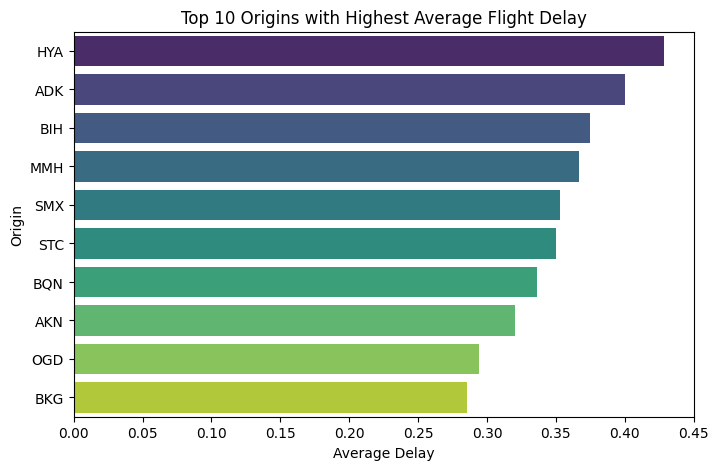

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the average delay probability for each origin
delay_by_origin = df.groupby("Origin")["DepDel15"].mean().sort_values(ascending=False)

# Select the top 10 origins with the highest average delay
top_10_origin = delay_by_origin.head(10)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_10_origin.values, y=top_10_origin.index, palette='viridis')
plt.title('Top 10 Origins with Highest Average Flight Delay')
plt.xlabel('Average Delay')
plt.ylabel('Origin')
plt.show()


## **Delayed Percentage per Origin**

In [102]:
import pandas as pd

# Step 1: Calculate Total Flights and Delayed Flights Per Origin
df_origin = df_new.groupby('Origin').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per origin
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per origin
).reset_index()

# Step 2: Calculate Delayed Percentage per Origin
df_origin['delayed_percentage'] = (df_origin['delayed_flights'] / df_origin['total_flights']) * 100

# Step 3: Display all rows sorted by delayed_percentage in descending order
pd.set_option('display.max_rows', None)  # Show all rows
df_origin_display = df_origin.sort_values(by='delayed_percentage', ascending=False)

# Print the table
print(df_origin_display)


    Origin  total_flights  delayed_flights  delayed_percentage
65     CDB             15                8           53.333333
171    HYA              7                3           42.857143
244    MMH             30               11           36.666667
345    SMX             17                6           35.294118
153    GST             12                4           33.333333
13     AKN             25                8           32.000000
9      ADK             10                3           30.000000
52     BQN            235               69           29.361702
209    LCK            135               39           28.888889
43     BKG              7                2           28.571429
366    TTN            269               76           28.252788
174    IAG             79               22           27.848101
22     ASE            566              152           26.855124
328    SCK             97               26           26.804124
306    RFD             98               26           26

## **Total Flights and Delayed Flights Per Destination**

In [103]:
import pandas as pd

# Step 1: Calculate Total Flights and Delayed Flights Per Destination
df_dest = df_new.groupby('Dest').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per destination
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per destination
).reset_index()

# Step 2: Calculate Delayed Percentage per Destination
df_dest['delayed_percentage'] = (df_dest['delayed_flights'] / df_dest['total_flights']) * 100

# Step 3: Display all rows sorted by delayed_percentage in descending order
pd.set_option('display.max_rows', None)  # Show all rows
df_dest_display = df_dest.sort_values(by='delayed_percentage', ascending=False)

# Print the table
print(df_dest_display)


    Dest  total_flights  delayed_flights  delayed_percentage
109  DUT             35               22           62.857143
39   BIH              6                3           50.000000
43   BKG             10                5           50.000000
345  SMX             24               11           45.833333
351  STC             23                8           34.782609
295  PSM             41               13           31.707317
196  JST             19                6           31.578947
290  PQI             51               16           31.372549
293  PSE             80               25           31.250000
171  HYA             13                4           30.769231
52   BQN            199               61           30.653266
35   BFM              7                2           28.571429
9    ADK             18                5           27.777778
328  SCK             69               19           27.536232
254  MVY             63               17           26.984127
29   AZA            688 

## **Delayed Percentage per Operating Airline**

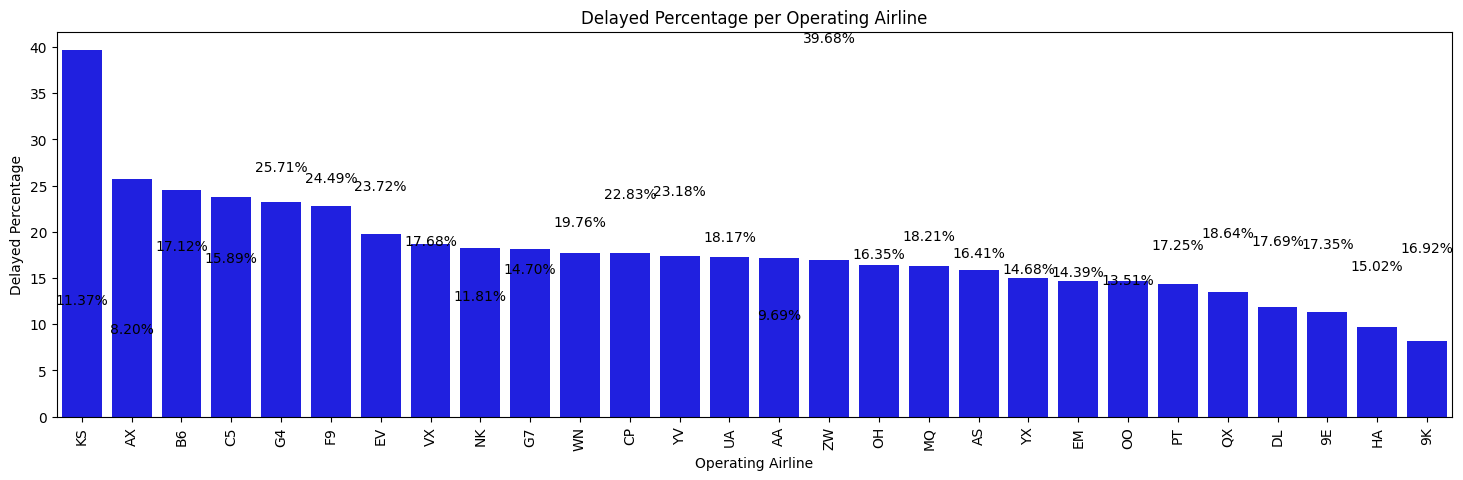

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Operating Airline
df_operating_airline = df_new.groupby('Operating_Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per operating airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per operating airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Operating Airline
df_operating_airline['delayed_percentage'] = (df_operating_airline['delayed_flights'] / df_operating_airline['total_flights']) * 100

# Step 3: Sort the values by delayed percentage
df_operating_airline = df_operating_airline.sort_values(by='delayed_percentage', ascending=False)

# Step 4: Create a Bar Plot with Delayed Percentage
plt.figure(figsize=(18, 5))
sns.barplot(x='Operating_Airline', y='delayed_percentage', data=df_operating_airline, color='blue')  # Use solid blue color

# Add data labels for Delayed Percentage
for index, row in df_operating_airline.iterrows():
    plt.text(row.name, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Operating Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Operating Airline")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()


## **Delayed Percentage per Distance Group**

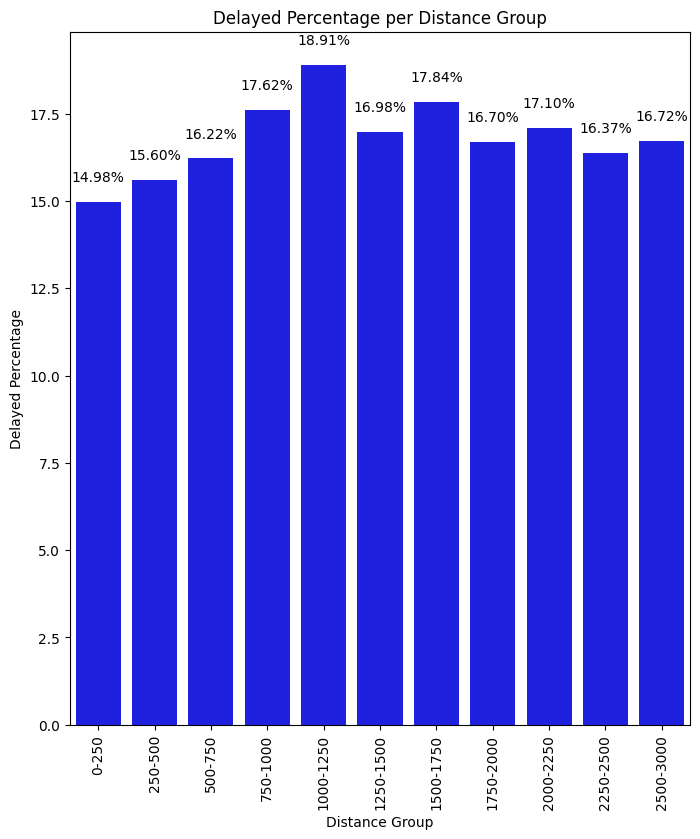

'\nso here we can see that their is not a pecific pattern with distance group so we can not say that the distance group is the main factor for the delay\n'

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Distance Group
df_distance_group = df_new.groupby('DistanceGroup').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per distance group
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per distance group
).reset_index()

# Step 2: Calculate Delayed Percentage per Distance Group
df_distance_group['delayed_percentage'] = (df_distance_group['delayed_flights'] / df_distance_group['total_flights']) * 100

# Step 3: Map numerical distance groups to actual range labels
distance_ranges = {
    1: '0-250',
    2: '250-500',
    3: '500-750',
    4: '750-1000',
    5: '1000-1250',
    6: '1250-1500',
    7: '1500-1750',
    8: '1750-2000',
    9: '2000-2250',
    10: '2250-2500',
    11: '2500-3000'
}

# Replace the numerical labels with actual range labels
df_distance_group['DistanceRange'] = df_distance_group['DistanceGroup'].map(distance_ranges)

# Step 4: Sort the values by delayed percentage
df_distance_group = df_distance_group.sort_values(by='delayed_percentage', ascending=False)

# Step 5: Make 'DistanceRange' a categorical column with the correct order
df_distance_group['DistanceRange'] = pd.Categorical(df_distance_group['DistanceRange'],
                                                     categories=['0-250', '250-500', '500-750', '750-1000',
                                                                '1000-1250', '1250-1500', '1500-1750',
                                                                '1750-2000', '2000-2250', '2250-2500', '2500-3000'],
                                                     ordered=True)

# Step 6: Create a Bar Plot with Delayed Percentage using the actual distance range labels
plt.figure(figsize=(8, 9))
sns.barplot(x='DistanceRange', y='delayed_percentage', data=df_distance_group, color='blue')

# Add data labels for Delayed Percentage
for index, row in df_distance_group.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

# Labeling axes and title
plt.xlabel("Distance Group")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Distance Group")
plt.xticks(rotation=90)
plt.show()



"""
so here we can see that their is not a pecific pattern with distance group so we can not say that the distance group is the main factor for the delay
"""


## **Average Arrival Delay Based on Differrent Periods Of Day**


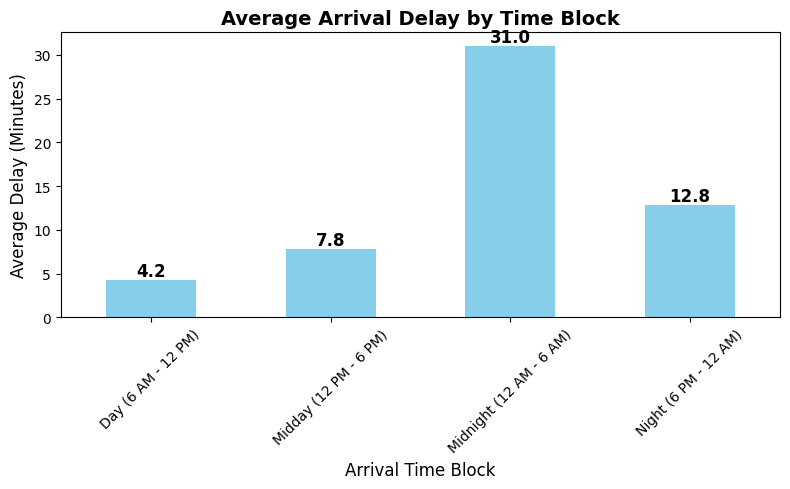

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to categorize arrival time into blocks
def categorize_time(arr_time):
    if 600 <= arr_time < 1200:
        return 'Day (6 AM - 12 PM)'
    elif 1200 <= arr_time < 1800:
        return 'Midday (12 PM - 6 PM)'
    elif 1800 <= arr_time < 2400:
        return 'Night (6 PM - 12 AM)'
    else:
        return 'Midnight (12 AM - 6 AM)'

# Apply the function to create a new column
df_new['ArrivalTimeBlock'] = df_new['ArrTime'].apply(categorize_time)

# Calculate average delay per time block
time_block_delay = df_new.groupby('ArrivalTimeBlock')['ArrDelayMinutes'].mean()

# Create a figure with adjusted size and layout
plt.figure(figsize=(8, 5))

# Plot the bar chart
ax = time_block_delay.plot(kind='bar', color='skyblue')

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',  # Format to 1 decimal place
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize the plot
plt.xlabel('Arrival Time Block', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.title('Average Arrival Delay by Time Block', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## **ANALYSIS BASED ON ROUTE**

In [107]:
df['Route'] = df['Origin'] + ' → ' + df['Dest']

In [108]:
route_delay = df.groupby('Route')['ArrDelayMinutes'].mean().reset_index()

## **Top 20 Routes with Highest Average Arrival Delay**

In [109]:
top_20_routes = route_delay.sort_values(by='ArrDelayMinutes', ascending=False).head(20)
print(top_20_routes)

          Route  ArrDelayMinutes
171   ASE → SNA       183.000000
608   BHM → SFO       165.000000
5719  PHX → SCK       132.000000
2365  EUG → PSP       130.000000
669   BMI → TPA       130.000000
3433  JAC → BOS       119.000000
6259  RSW → SFO       119.000000
4967  OGD → LAX       118.000000
6112  RFD → VPS       115.000000
5092  ORD → AGS       114.000000
5881  PNS → CLE       114.000000
1797  DEN → GSO       113.000000
3085  IAD → COS       110.000000
6868  SJU → CVG       110.000000
5514  PHL → AGS       100.000000
4516  MIA → SWF        99.500000
6466  SCE → BNA        98.000000
491   AZA → GEG        95.000000
3907  LEX → EWR        92.055556
1035  BZN → FLL        91.000000


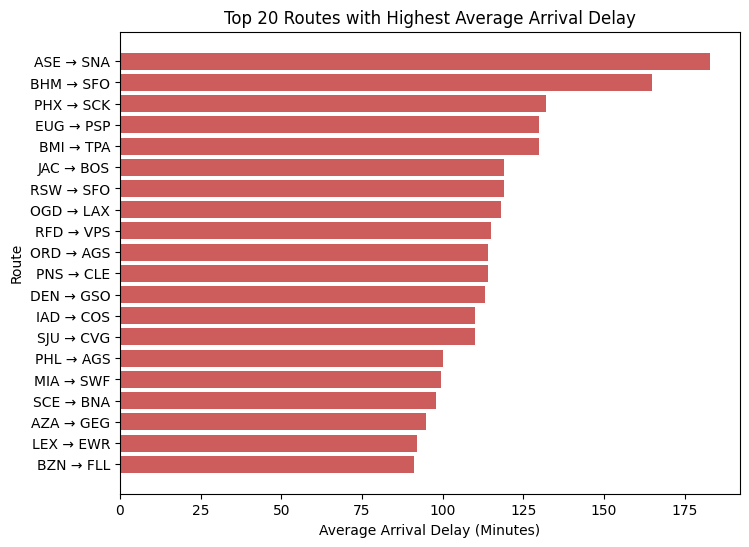

In [110]:
plt.figure(figsize=(8, 6))
plt.barh(top_20_routes['Route'], top_20_routes['ArrDelayMinutes'], color='indianred')
plt.xlabel('Average Arrival Delay (Minutes)')
plt.ylabel('Route')
plt.title('Top 20 Routes with Highest Average Arrival Delay')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

## **Feature Correlation with DepDelay and ArrDelay**

                      DepDel15  ArrDel15
DepDel15              1.000000  0.732265
DepartureDelayGroups  0.790644  0.697293
DepDelay              0.782157  0.700358
DepDelayMinutes       0.769453  0.691060
ArrDel15              0.732265  1.000000
ArrDelay              0.703012  0.775425
ArrivalDelayGroups    0.701328  0.784786
ArrDelayMinutes       0.685227  0.765525
Hour                  0.205887  0.170144
DepTime               0.204702  0.169341


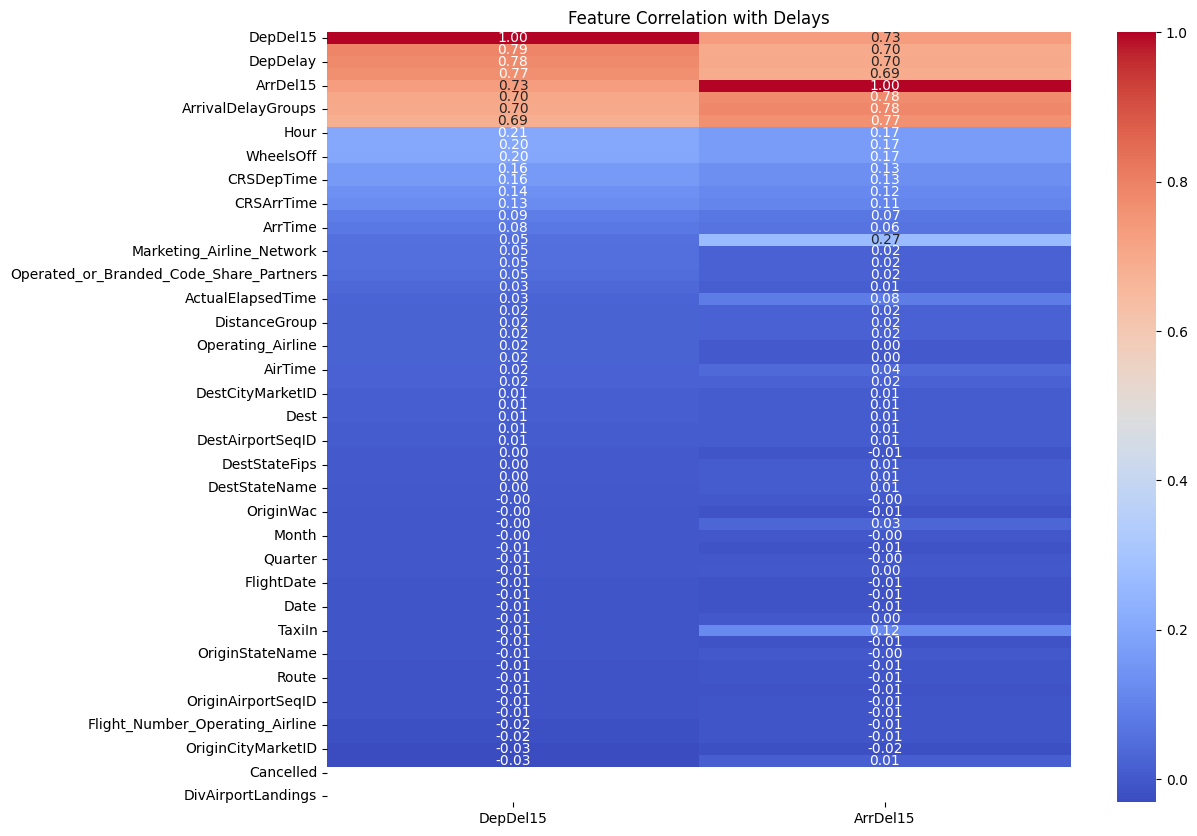

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Selecting numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Step 2: Encoding categorical columns using Label Encoding
df_encoded = df.copy()  # Create a copy to avoid modifying the original data
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

# Step 3: Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Step 4: Extract correlations of delay-related columns
delay_correlations = correlation_matrix[['DepDel15', 'ArrDel15']].sort_values(
    by=['DepDel15', 'ArrDel15'], ascending=False
)

# Step 5: Display top correlated features
print(delay_correlations.head(10))

# Step 6: Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(delay_correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Delays")
plt.show()


## **ANALYSIS ON TAXI IN AND TAXI OUT**

## **Mode of TaxiOut by Month**

In [112]:
# Calculate IQR
Q1 = df['TaxiOut'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['TaxiOut'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['TaxiOut'] < lower_bound) | (df['TaxiOut'] > upper_bound)]
print("Number of outliers:", len(outliers))


Number of outliers: 41916


In [113]:
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

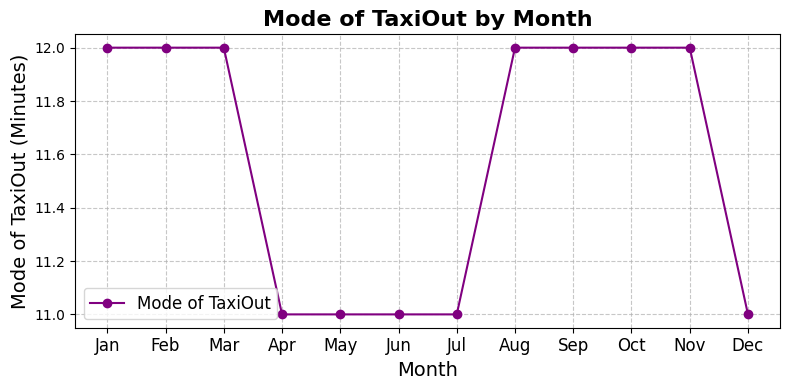

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Month' and find the mode of 'TaxiOut'
taxiout_mode_by_month = df.groupby('Month')['TaxiOut'].agg(lambda x: x.mode()[0])

# Plot the mode of TaxiOut by month
plt.figure(figsize=(8, 4))
plt.plot(taxiout_mode_by_month.index, taxiout_mode_by_month.values, marker='o', linestyle='-', color='purple', label='Mode of TaxiOut')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mode of TaxiOut (Minutes)', fontsize=14)
plt.title('Mode of TaxiOut by Month', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## **TaxiOut by Month**

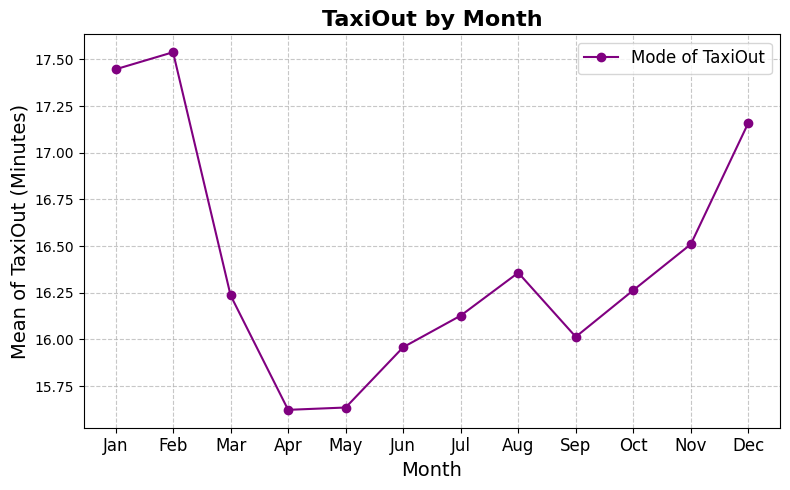

In [115]:
# Group by 'Month' and find the mode of 'TaxiOut'
taxiout_mode_by_month = df.groupby('Month')['TaxiOut'].mean()

# Plot the mode of TaxiOut by month
plt.figure(figsize=(8, 5))
plt.plot(taxiout_mode_by_month.index, taxiout_mode_by_month.values, marker='o', linestyle='-', color='purple', label='Mode of TaxiOut')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean of TaxiOut (Minutes)', fontsize=14)
plt.title('TaxiOut by Month', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## **Correlation of 'Delayed' with All Numeric Features**

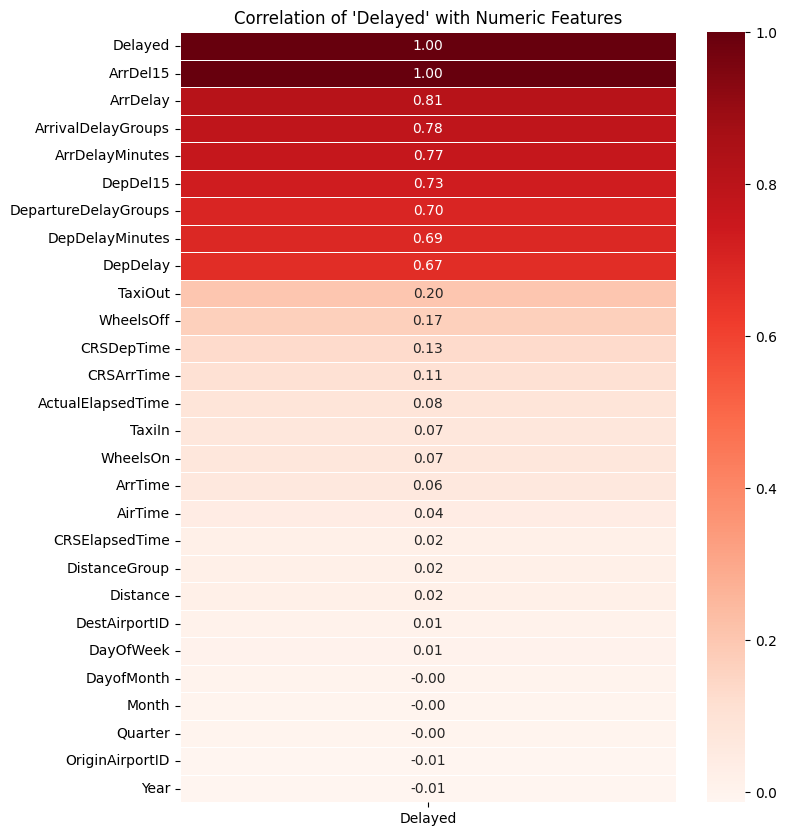

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Identify only numerical columns
numerical_cols = df_new.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Compute correlation of 'Delayed' with numerical columns only
delayed_correlation = df_new[numerical_cols].corr()[["Delayed"]].sort_values(by="Delayed", ascending=False)

# Step 3: Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(delayed_correlation, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)

plt.title("Correlation of 'Delayed' with Numeric Features")
plt.show()


## **Correlation of Numeric Features with 'Delayed**

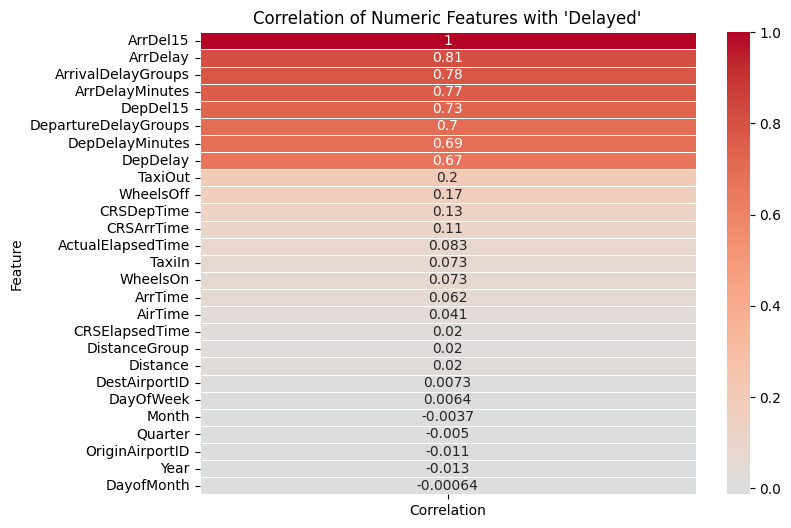


P-Values for Correlation (Sorted):
                 Feature        P-Value  Significant Correlation Status
24              ArrDel15   0.000000e+00         True         Correlated
23              ArrDelay   0.000000e+00         True         Correlated
25    ArrivalDelayGroups   0.000000e+00         True         Correlated
4        ArrDelayMinutes   0.000000e+00         True         Correlated
16              DepDel15   0.000000e+00         True         Correlated
17  DepartureDelayGroups   0.000000e+00         True         Correlated
1        DepDelayMinutes   0.000000e+00         True         Correlated
2               DepDelay   0.000000e+00         True         Correlated
18               TaxiOut   0.000000e+00         True         Correlated
19             WheelsOff   0.000000e+00         True         Correlated
0             CRSDepTime   0.000000e+00         True         Correlated
22            CRSArrTime   0.000000e+00         True         Correlated
7      ActualElapsedTime   0

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Ensure 'Delayed' column exists
if 'Delayed' not in df_new.columns:
    possible_delay_cols = ['DepDel15', 'ArrDel15', 'DepDelayMinutes', 'ArrDelayMinutes']

    for col in possible_delay_cols:
        if col in df_new.columns:
            print(f"Using '{col}' as the delay indicator.")
            if col in ['DepDel15', 'ArrDel15']:
                df_new = df_new.rename(columns={col: "Delayed"})  # Binary column (0/1)
            else:
                df_new["Delayed"] = (df_new[col] > 15).astype(int)  # Convert minutes to binary
            break
    else:
        raise KeyError("No suitable 'Delayed' column found in df_new!")

# Step 2: Identify numerical columns
numerical_cols = df_new.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 3: Compute correlation and p-values for each numerical column with 'Delayed'
correlation_values = []
p_values = []
features = []

for col in numerical_cols:
    if col != 'Delayed':  # Avoid self-correlation
        corr, p_val = stats.pearsonr(df_new[col], df_new['Delayed'])
        correlation_values.append(corr)
        p_values.append(p_val)
        features.append(col)

# Step 4: Create DataFrame with correlation and p-values
correlation_df = pd.DataFrame({'Feature': features,
                               'Correlation': correlation_values,
                               'P-Value': p_values})

# Step 5: Add significance column
correlation_df['Significant'] = correlation_df['P-Value'] < 0.05

# Step 6: Add 'Correlation Status' column
correlation_df['Correlation Status'] = correlation_df.apply(
    lambda row: "Correlated" if row['Significant'] and abs(row['Correlation']) > 0.1 else "Not Correlated", axis=1
)

# Step 7: **Sort DataFrame** (Correlated features first)
correlation_df = correlation_df.sort_values(by=['Significant', 'Correlation'], ascending=[False, False])

# Step 8: Plot heatmap of correlation values
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df.set_index('Feature')[['Correlation']], annot=True, cmap='coolwarm', center=0, linewidths=0.5)

plt.title("Correlation of Numeric Features with 'Delayed'")
plt.show()

# Step 9: Print P-values table with correlation status
print("\nP-Values for Correlation (Sorted):")
print(correlation_df[['Feature', 'P-Value', 'Significant', 'Correlation Status']])


## **Top 10 & Bottom 10 Origin-Destination Pairs by Taxi Time**

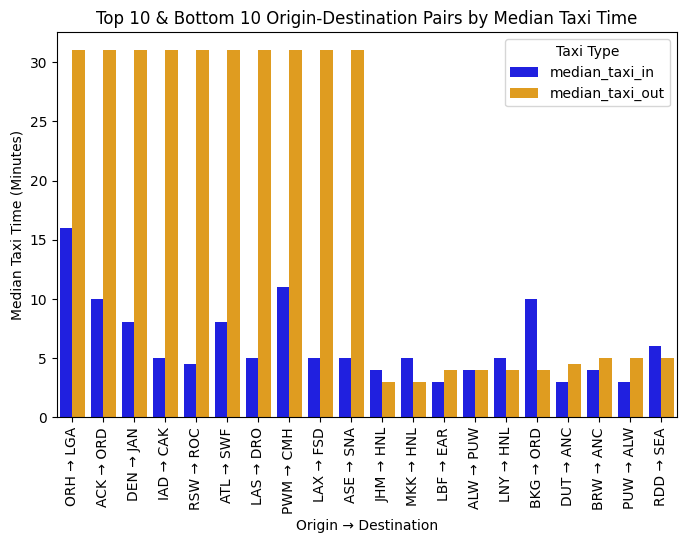

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Calculate Median Taxi-In & Taxi-Out Time Per Origin-Destination Pair
df_route_taxi = df_new.groupby(['Origin', 'Dest']).agg(
    median_taxi_in=('TaxiIn', 'median'),
    median_taxi_out=('TaxiOut', 'median')
).reset_index()

# Step 2: Sort & Get Top 10 (Longest Taxi Times) and Bottom 10 (Shortest Taxi Times)
df_top_10 = df_route_taxi.sort_values(by='median_taxi_out', ascending=False).head(10)
df_bottom_10 = df_route_taxi.sort_values(by='median_taxi_out', ascending=True).head(10)

# Step 3: Merge both datasets for visualization
df_selected = pd.concat([df_top_10, df_bottom_10])

# Step 4: Create 'Route' Column for Visualization
df_selected['Route'] = df_selected['Origin'] + " → " + df_selected['Dest']

# Step 5: Convert Data to Long Format for Grouped Bar Plot
df_selected_melted = df_selected.melt(id_vars=['Route'],
                                      value_vars=['median_taxi_in', 'median_taxi_out'],
                                      var_name='Taxi Type',
                                      value_name='Time (Minutes)')

# Step 6: Plot the Data
plt.figure(figsize=(8, 5))
sns.barplot(x='Route', y='Time (Minutes)', hue='Taxi Type', data=df_selected_melted, palette=['blue', 'orange'])

# Step 7: Customize the Plot
plt.xlabel("Origin → Destination")
plt.ylabel("Median Taxi Time (Minutes)")
plt.title("Top 10 & Bottom 10 Origin-Destination Pairs by Median Taxi Time")
plt.xticks(rotation=90)  # Rotate route names for better readability
plt.legend(title="Taxi Type")

# Show the Plot
plt.show()


## **Percentage of Delay Flights with City**

In [119]:
# Group by destination and count the number of delayed flights
delayed_by_dest = df_new.groupby('DestCityName')['ArrDel15'].sum().reset_index()

# Count total flights per destination
total_flights_by_dest = df_new.groupby('DestCityName')['ArrDel15'].count().reset_index()

# Merge both dataframes
delayed_by_dest = delayed_by_dest.merge(total_flights_by_dest, on='DestCityName', suffixes=('_delayed', '_total'))

# Calculate percentage of delayed flights
delayed_by_dest['Delay_Percentage'] = (delayed_by_dest['ArrDel15_delayed'] / delayed_by_dest['ArrDel15_total']) * 100

# Sort the cities by percentage of delayed flights
delayed_by_dest_sorted = delayed_by_dest.sort_values(by='Delay_Percentage', ascending=False)

# Print the top 10 cities with the highest percentage of delayed flights
print(delayed_by_dest_sorted[['DestCityName', 'Delay_Percentage']].head(10))

                 DestCityName  Delay_Percentage
354              Unalaska, AK         62.857143
37                 Bishop, CA         50.000000
44                Branson, MO         50.000000
317           Santa Maria, CA         45.833333
334             St. Cloud, MN         34.782609
277            Portsmouth, NH         31.707317
169             Johnstown, PA         31.578947
279  Presque Isle/Houlton, ME         31.372549
274                 Ponce, PR         31.250000
157               Hyannis, MA         30.769231


## **Pair Plot**

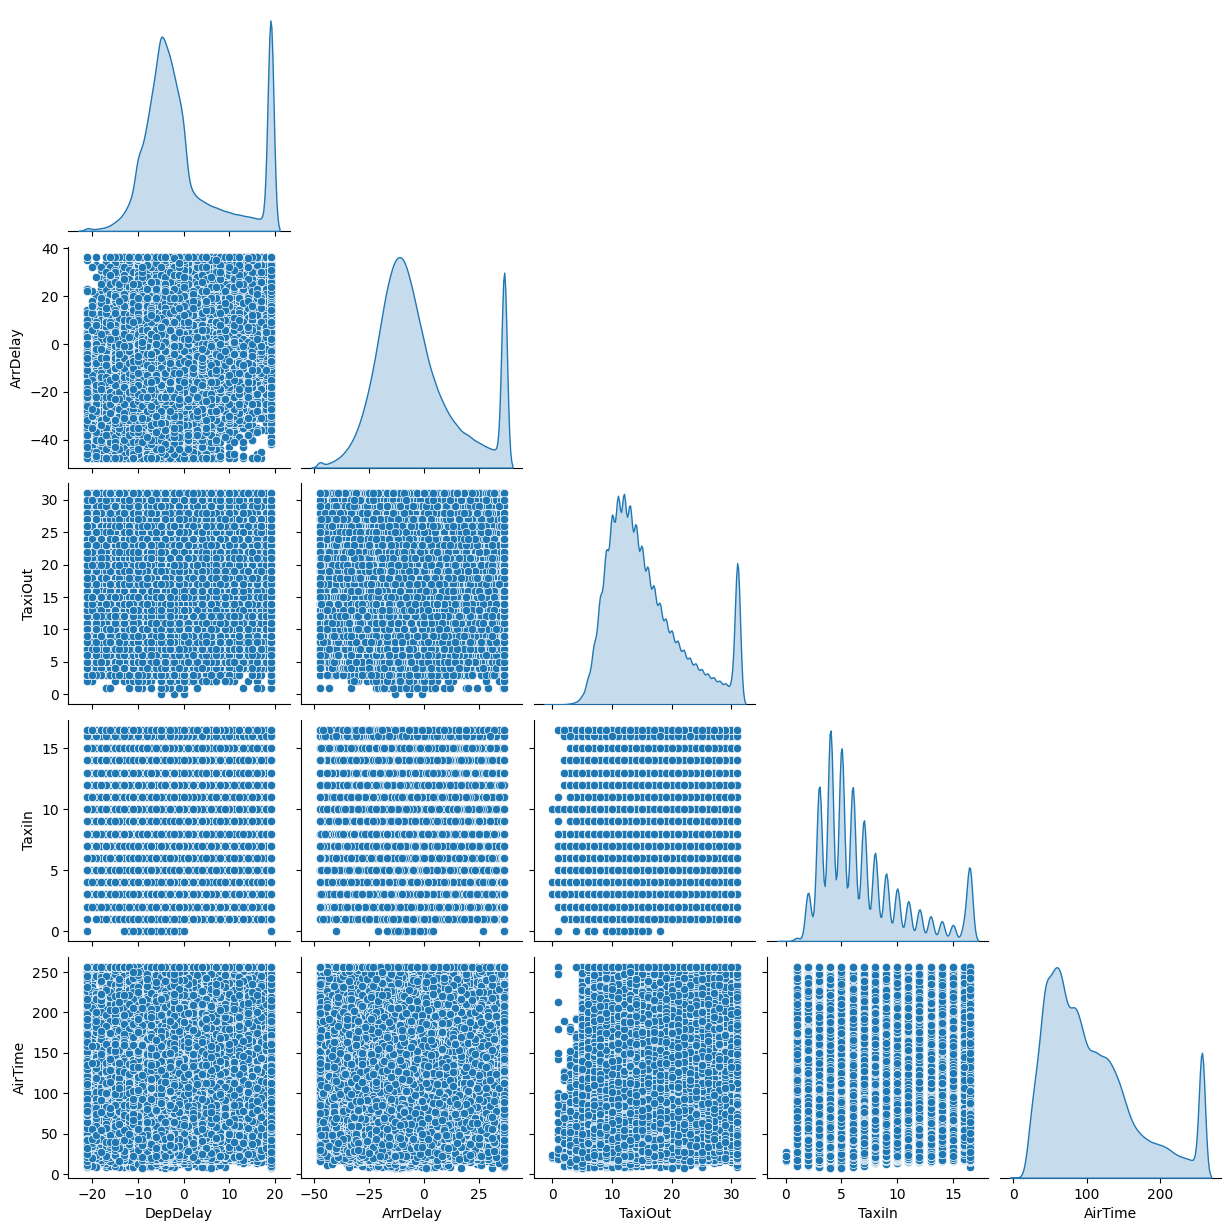

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['DepDelay', 'ArrDelay', 'TaxiOut', 'TaxiIn', 'AirTime']

sns.pairplot(df_new[numerical_cols], diag_kind='kde', corner=True)

plt.show()


## **Feature Categories Based on Correlation with 'Delayed**

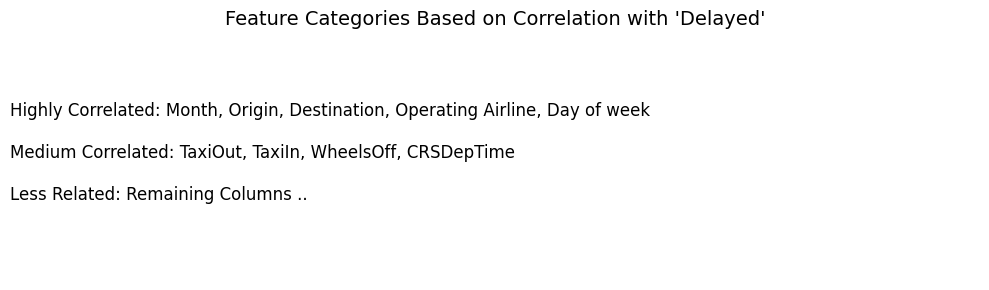

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the categories based on your analysis
highly_correlated = ['Month', 'Origin', 'Destination', 'Operating Airline', 'Day of week']
medium_correlated = ['TaxiOut', 'TaxiIn', 'WheelsOff', 'CRSDepTime']
less_related = ['Remaining Columns ..']  # Remaining columns are grouped here

# Create a DataFrame to represent these categories and their counts
category_data = {
    'Category': ['Highly Correlated', 'Medium Correlated', 'Less Related'],
    'Features': [', '.join(highly_correlated), ', '.join(medium_correlated), ', '.join(less_related)],
}

category_df = pd.DataFrame(category_data)

# Plotting the graph
plt.figure(figsize=(10, 3))

# Create the plot by simply using text to display categories and their features
plt.text(0, 0.72, f"Highly Correlated: {category_df['Features'][0]}", fontsize=12, ha='left', va='top')
plt.text(0, 0.55, f"Medium Correlated: {category_df['Features'][1]}", fontsize=12, ha='left', va='top')
plt.text(0, 0.38, f"Less Related: {category_df['Features'][2]}", fontsize=12, ha='left', va='top')

# Remove the axis
plt.axis('off')

# Customize the plot with title
plt.title("Feature Categories Based on Correlation with 'Delayed'", fontsize=14)

# Adjust layout to ensure the text fits properly
plt.tight_layout()

# Show plot
plt.show()
